In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [39]:
data=pd.read_excel('E:\datascience\Data_Train.xlsx')

In [40]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [41]:
data.shape

(10683, 11)

In [42]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [43]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [44]:
data['Route']=data['Route'].fillna(data['Route'].mode()[0])

In [45]:
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

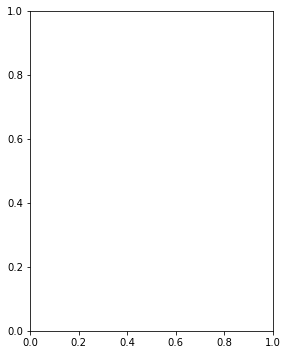

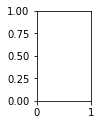

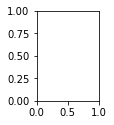

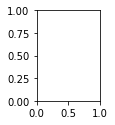

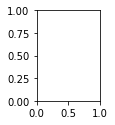

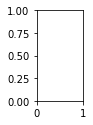

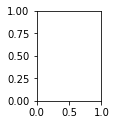

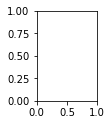

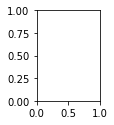

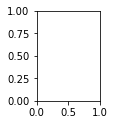

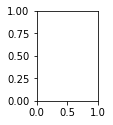

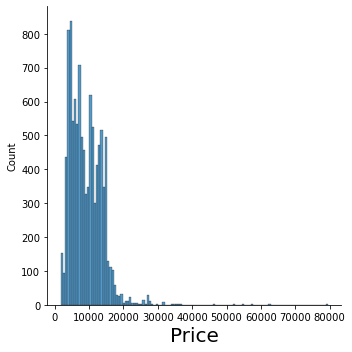

In [46]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4, plotnumber)
        sns.displot(data[column])
        plt.xlabel(column,fontsize=20)
        
    
plt.tight_layout()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [47]:
data.dropna(inplace=True)

In [49]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [55]:
data=data.replace({'Airline':{'Air Asia':0,'Air India':1,'GoAir':2,'IndiGo':3,'Jet Airways':4,'Jet Airways Business':5,'Multiple carriers':6,'Multiple carriers Premium economy':7,'SpiceJet':8,'Trujet':9,'Vistara':10,'Vistara Premium economy':11}})

In [59]:
data=data.replace({'Source':{'Banglore':0,'Kolkata':1,'Delhi':2,'Chennai':3,'Mumbai':4}})

In [61]:
data=data.replace({'Destination':{'New Delhi':0,'Banglore':1,'Cochin':2,'Kolkata':3,'Hyderabad':4,'Delhi':5}})

In [62]:
data=data.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':3,'3 stops':4,'4 stops':5,'':6}})

In [63]:
data=data.replace({'Additional_Info':{'No info':0,'In-flight meal not included':1,'1 Long layover':3,'1 Short layover':4,'2 Long layover':5,'Business class':6,'Change airports':7,'No check-in baggage included':8,'Red-eye flight':9}})

In [77]:
data=data.drop(columns={'Date_of_Journey'})

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [82]:
ohe=OneHotEncoder()
si=SimpleImputer()

In [88]:
ct=make_column_transformer(ohe,['Route'])

TypeError: 'OneHotEncoder' object is not iterable

In [78]:
x=data.drop(columns=['Price'])
y=data['Price']

In [79]:
x

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,0
1,1,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,3,0
2,4,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,3,0
3,3,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1,0
4,3,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1,0
...,...,...,...,...,...,...,...,...,...
10678,0,1,1,CCU → BLR,19:55,22:25,2h 30m,0,0
10679,1,1,1,CCU → BLR,20:45,23:20,2h 35m,0,0
10680,4,0,5,BLR → DEL,08:20,11:20,3h,0,0
10681,10,0,0,BLR → DEL,11:30,14:10,2h 40m,0,0


In [80]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

ValueError: could not convert string to float: 'BLR → DEL'